<a href="https://colab.research.google.com/github/suacalis/IK-Analitigi-2023/blob/main/Word2vec_TDV_I%CC%87slam_Ansiklopedis_44_Cilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Klasör yolunu belirtin
klasor_yolu = '/Users/suayyipc/indir/TDV_IslamAnsiklopedisi1-44'

# Dosya birleştirme işlemi için hedef dosya adını ve yolunu belirtin
hedef_dosya = 'tdv_islam_dosya.txt'

# Hedef dosyayı açın ve birleştirme işlemini gerçekleştirin
with open(hedef_dosya, 'w') as hedef:
    # Klasördeki tüm dosyaları gezin
    for dosya_adı in os.listdir(klasor_yolu):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adı)
        # Sadece metin dosyalarını işleyin
        if os.path.isfile(dosya_yolu) and dosya_adı.endswith('.txt'):
            # Dosyayı açın ve içeriğini hedef dosyaya yazın
            with open(dosya_yolu, 'r') as dosya:
                hedef.write(dosya.read())
                hedef.write('\n')  # Her dosya için bir satır boşluk bırakın (isteğe bağlı)

In [2]:
# Specify the file path
file_path = '/content/tdv_islam_dosya.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the contents of the file
    file_contents = file.read()

# Print the file contents
#print(file_contents)

In [3]:
# Python program to generate word vectors using Word2Vec 
# importing all necessary modules 
import nltk
import gensim
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 
 
stopWords = set(stopwords.words('turkish'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = [] 
# iterate through each sentence in the file 
for w in sent_tokenize(file_contents):
    temp = [] 
    
    # tokenize the sentence into words 
words = word_tokenize(file_contents) 
for w in words:
    if w not in stopWords:
        temp.append(w)
data.append(temp)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
text = []
for i in data:
    text.append(i)
text = ''.join(map(str, text)) 
wordcloud = WordCloud(width=40, height=20, max_font_size=12,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored

In [5]:
# Create CBOW model 
modeltdv1 = gensim.models.Word2Vec(data, min_count=1, vector_size=200, window=10, alpha=0.25)

In [7]:
print("Cosine similarity between 'islam' and 'günah' - CBOW:",
      modeltdv1.wv.similarity('islam', 'günah'))
print("Cosine similarity between 'islam' and 'sevap' - CBOW:",
      modeltdv1.wv.similarity('islam', 'günah'))


Cosine similarity between 'islam' and 'günah' - CBOW: -0.031860303
Cosine similarity between 'islam' and 'sevap' - CBOW: -0.031860303


In [8]:
# Create Skip Gram model 
modeltdv2 = gensim.models.Word2Vec(data, min_count=1, vector_size = 300, alpha=0.025, window = 10, sg = 1) 
# Print results 
print("Cosine similarity between 'kodlu' " +
            "ve  'uyarının' - Skip Gram : ", 
    modeltdv2.wv.similarity('günah','sevap')) 
    
print("Cosine similarity between 'kodlu' " +
            "ve 'yapıldığı' - Skip Gram : ", 
    modeltdv2.wv.similarity('günah','cehennem')) 

Cosine similarity between 'kodlu' ve  'uyarının' - Skip Gram :  -0.013520704
Cosine similarity between 'kodlu' ve 'yapıldığı' - Skip Gram :  0.052964542


In [9]:
# Örnek kelime ilişkileri
related_words = modeltdv2.wv.most_similar('melek')
print("Kelime ile İlişkili Kelimeler:")
for word, score in related_words:
    print(word, "-", score)


Kelime ile İlişkili Kelimeler:
Duyulara - 0.28568774461746216
91.650 - 0.2751893103122711
Yîn - 0.27067461609840393
Fashu - 0.26648953557014465
meditations - 0.26648420095443726
öbürünün - 0.260927677154541
Kâdâr - 0.2600989043712616
Arziyye - 0.2597561180591583
^'■ - 0.2551567852497101
bezeme - 0.2547305226325989


In [10]:
# Örnek kelime ilişkileri
related_words = modeltdv1.wv.most_similar('iyilik')
print("Kelime ile İlişkili Kelimeler:")
for word, score in related_words:
    print(word, "-", score)


Kelime ile İlişkili Kelimeler:
Bizans¬ - 0.36761489510536194
Topal - 0.3305349051952362
ağlamıştı - 0.3246912956237793
gelişmekte - 0.3219803273677826
ülkesinde¬ - 0.3216066062450409
sızdırılarak - 0.3156568109989166
İşbâtüT- - 0.31068313121795654
Dürnâ - 0.30768778920173645
-Ajr- - 0.3027702867984772
jlks - 0.300633043050766


In [11]:
modeltdv1.wv.most_similar("din")

[('te', 0.9996785521507263),
 ('’', 0.9996393322944641),
 ('Sultan', 0.999617338180542),
 ('Bâ-', 0.9995611310005188),
 ('28', 0.9995493292808533),
 ('Şubat', 0.9995278120040894),
 ('tekrar', 0.9995033144950867),
 ('âyan', 0.9994907379150391),
 ('Nitekim', 0.9994763135910034),
 ('uygulanan', 0.9994751214981079)]

In [12]:
modeltdv2.wv.most_similar("peygamber")

[('cioa', 0.27981773018836975),
 ('Pekak', 0.2739202380180359),
 ('989-1054', 0.2657325267791748),
 ('İnschriiten', 0.2610427141189575),
 ("Şavmü't-tetav-", 0.2605057954788208),
 ('931/1524-25', 0.255611777305603),
 ('Attributive', 0.254823237657547),
 ('kokuları', 0.2501731812953949),
 ('3279', 0.24996516108512878),
 ('Yenikiyev', 0.2491937130689621)]

In [13]:
modeltdv1.save("tdv1_word2vec.model")

In [14]:
modeltdv2.save("tdv2_word2vec.model")

In [ ]:
modeltdv1 = Word2Vec.load("tdv1_word2vec.model")

In [ ]:
modeltdv2 = Word2Vec.load("tdv2_word2vec.model")

In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Word2Vec modelini yükleyin
model = gensim.models.Word2Vec.load('modelinizin_yolu')

# Görselleştirmek istediğiniz kelimeleri belirleyin
kelimeler = ['tanrı', 'insan', 'bilim', 'sanat', 'doğa']

# Kelime vektörlerini alın
kelime_vektörleri = np.array([model.wv[kelime] for kelime in kelimeler])

# t-SNE ile boyut indirgeme yapın
tsne = TSNE(n_components=2, random_state=42)
kelime_vektörleri_2d = tsne.fit_transform(kelime_vektörleri)

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(kelime_vektörleri_2d[:, 0], kelime_vektörleri_2d[:, 1])
for i, kelime in enumerate(kelimeler):
    plt.annotate(kelime, (kelime_vektörleri_2d[i, 0], kelime_vektörleri_2d[i, 1]))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Kelime Görselleştirme')
plt.show()


In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Word2Vec modelini yükleyin
model = gensim.models.Word2Vec.load('modelinizin_yolu')

# Görselleştirmek istediğiniz kelimeleri belirleyin
kelimeler = ['tanrı', 'insan', 'bilim', 'sanat', 'doğa']

# Kelime vektörlerini alın
kelime_vektörleri = np.array([model.wv[kelime] for kelime in kelimeler])

# 3D grafik için figür oluşturun
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Her kelimenin 3D koordinatlarını plot edin
ax.scatter(kelime_vektörleri[:, 0], kelime_vektörleri[:, 1], kelime_vektörleri[:, 2])

# Her kelimenin üzerine etiket yazın
for i, kelime in enumerate(kelimeler):
    ax.text(kelime_vektörleri[i, 0], kelime_vektörleri[i, 1], kelime_vektörleri[i, 2], kelime)

# Eksen etiketlerini ve başlığı ayarlayın
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Word2Vec Kelime Görselleştirme')

# Grafikleri gösterin
plt.show()


In [ ]:
import gensim

# Word2Vec modelini yükleyin
model = gensim.models.Word2Vec.load('modelinizin_yolu')

# En çok geçen kelimeleri alın
en_cok_gecenler = modeltdv1.wv.index_to_key[:10]  # İlk 10 kelimeyi almak için

# En çok geçen kelimeleri yazdırın
print("En Çok Geçen Kelimeler:")
for kelime in en_cok_gecenler:
    print(kelime)


In [26]:
import gensim

# Word2Vec modelini yükleyin
#model = gensim.models.Word2Vec.load('modelinizin_yolu')

# En çok geçen kelimeleri alın
en_cok_gecenler = modeltdv1.wv.index_to_key[:150]  # İlk 50 kelimeyi almak için

# En çok geçen kelimelerin sayısını gösterin
print("En Çok Geçen Kelimeler ve Geçme Sayıları:")
for kelime in en_cok_gecenler:
    sayi = modeltdv1.wv.get_vecattr(kelime, "count")
    print(f"{kelime}: {sayi} kez geçti")



En Çok Geçen Kelimeler ve Geçme Sayıları:
,: 2292718 kez geçti
.: 1359564 kez geçti
’: 855493 kez geçti
): 537026 kez geçti
(: 527803 kez geçti
;: 423068 kez geçti
bir: 314165 kez geçti
s.: 212345 kez geçti
': 201099 kez geçti
“: 165888 kez geçti
”: 130430 kez geçti
:: 104969 kez geçti
b.: 102887 kez geçti
nin: 82528 kez geçti
olarak: 73593 kez geçti
in: 71543 kez geçti
olan: 71013 kez geçti
İbn: 66838 kez geçti
'': 64704 kez geçti
sonra: 63224 kez geçti
a: 62532 kez geçti
Bu: 61166 kez geçti
İstanbul: 59920 kez geçti
İslâm: 54033 kez geçti
-: 51643 kez geçti
II: 51228 kez geçti
Ebû: 47168 kez geçti
ın: 45800 kez geçti
Ankara: 44038 kez geçti
1: 43709 kez geçti
göre: 42727 kez geçti
I: 40741 kez geçti
yer: 40710 kez geçti
c: 40266 kez geçti
tarafından: 39623 kez geçti
nr: 38909 kez geçti
Muhammed: 38653 kez geçti
iki: 38547 kez geçti
‘: 38427 kez geçti
e: 37877 kez geçti
nşr: 36620 kez geçti
Ali: 36359 kez geçti
olduğu: 34085 kez geçti
Ahmed: 33318 kez geçti
Türkiye: 33046 kez geçti
il

In [22]:
import gensim
# En çok geçen kelimeleri alın
en_cok_gecenler = modeltdv2.wv.index_to_key[:50]  # İlk 10 kelimeyi almak için

# En çok geçen kelimeleri yazdırın
print("En Çok Geçen Kelimeler:")
for kelime in en_cok_gecenler:
    print(kelime)


En Çok Geçen Kelimeler:
,
.
’
)
(
;
bir
s.
'
“
”
:
b.
nin
olarak
in
olan
İbn
''
sonra
a
Bu
İstanbul
İslâm
-
II
Ebû
ın
Ankara
1
göre
I
yer
c
tarafından
nr
Muhammed
iki
‘
e
nşr
Ali
olduğu
Ahmed
Türkiye
ilk
kadar
arasında
nın
ye


In [20]:
import gensim

# Önceden eğitilmiş Word2Vec modelini yükleyin
#model = gensim.models.KeyedVectors.load_word2vec_format('path/to/pretrained_model.bin', binary=True)
model='modeltdv1'
# 'günah' kelimesinin kelime vektörünü alın
if 'sevap' in model:
    kelime_vektoru = modeltdv1['sevap']
    print("Kelime Vektörü:")
    print(kelime_vektoru)
else:
    print("'günah' kelimesi modelde bulunamadı.")


'günah' kelimesi modelde bulunamadı.


In [15]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Word2Vec modelini yükleyin
#model = gensim.models.Word2Vec.load('modelinizin_yolu')

# "günah" kelimesinin kelime vektörünü alın
kelime_vektoru = modeltdv1.wv['günah']

# Boyut indirgeme için PCA uygulayın
pca = PCA(n_components=2)
kelime_vektoru_2d = pca.fit_transform([kelime_vektoru])

# Grafik oluşturun
plt.figure()
plt.scatter(kelime_vektoru_2d[:, 0], kelime_vektoru_2d[:, 1])
plt.annotate('günah', (kelime_vektoru_2d[0, 0], kelime_vektoru_2d[0, 1]))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Kelime Görselleştirme')
plt.show()


ValueError: ignored

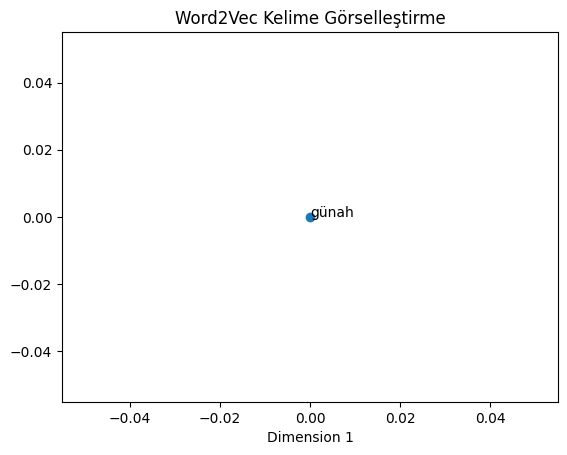

In [16]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Word2Vec modelini yükleyin
# model = gensim.models.Word2Vec.load('modelinizin_yolu')

# "günah" kelimesinin kelime vektörünü alın
kelime_vektoru = modeltdv1.wv['günah']

# Boyut indirgeme için PCA uygulayın
pca = PCA(n_components=1)  # PCA için n_components değerini 1 olarak ayarlayın
kelime_vektoru_1d = pca.fit_transform([kelime_vektoru])

# Grafik oluşturun
plt.figure()
plt.scatter(kelime_vektoru_1d[:, 0], [0])
plt.annotate('günah', (kelime_vektoru_1d[0, 0], 0))
plt.xlabel('Dimension 1')
plt.title('Word2Vec Kelime Görselleştirme')
plt.show()
